### Handling Missing Values and Outliers
Missing Values- here I am using fillna() to manage the missing values 

In [27]:
import pandas as pd

data = pd.read_csv('assignment_dataset.csv')


data['Salary']=data['Salary'].fillna(data['Salary'].mean())
data['Age']=data['Age'].fillna(data['Age']).median()

print("\nDataset after handling missing values:")
print(data.head())


Dataset after handling missing values:
    Age        Salary  Gender  Experience    Education
0  39.0  47334.018181    Male           1     Bachelor
1  39.0  43844.250370    Male           3          PhD
2  39.0  67695.745171  Female          18  High School
3  39.0  36526.880908  Female          10          PhD
4  39.0  62521.931288  Female           3  High School


Outliers- here outliers are detected by Z-scores and capped. Values with Z-score greater than 3 are treated as outliers

In [28]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(data['Salary']))
outliers = data[z_scores > 3] 
print("Outliers in Salary:")
print(outliers)

data['Salary'] = np.where(data['Salary'] > 150000, 150000, data['Salary'])

print("\nDataset after handling outliers:")
print(data.head())

Outliers in Salary:
     Age         Salary  Gender  Experience Education
26  39.0  172565.174919    Male           1    Master
27  39.0  202118.399382  Female           8    Master

Dataset after handling outliers:
    Age        Salary  Gender  Experience    Education
0  39.0  47334.018181    Male           1     Bachelor
1  39.0  43844.250370    Male           3          PhD
2  39.0  67695.745171  Female          18  High School
3  39.0  36526.880908  Female          10          PhD
4  39.0  62521.931288  Female           3  High School


### Generating Visualization like heatmap(correlation) scatterplots, histogram:

heatmap - here seaborn and matplotlib are used to plot and generate them 

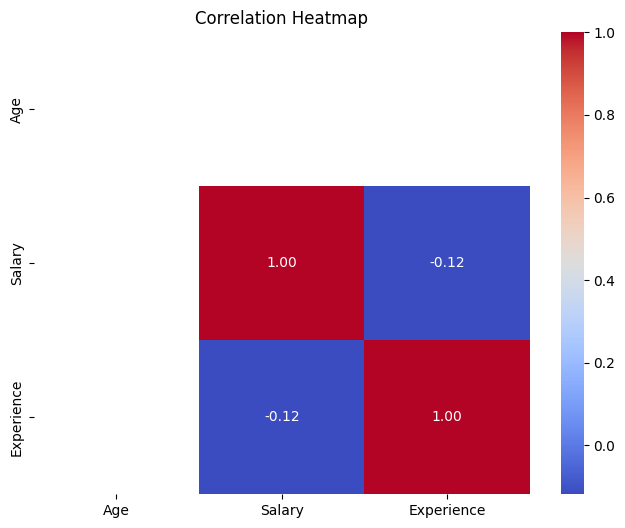

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

scatterplot - also here seaborn and matplotlib modules are used

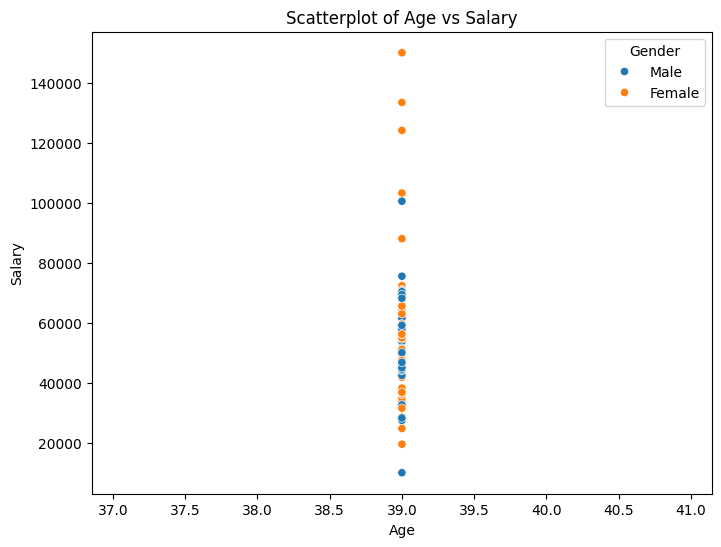

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Gender', data=data)
plt.title('Scatterplot of Age vs Salary')
plt.show()

histogram

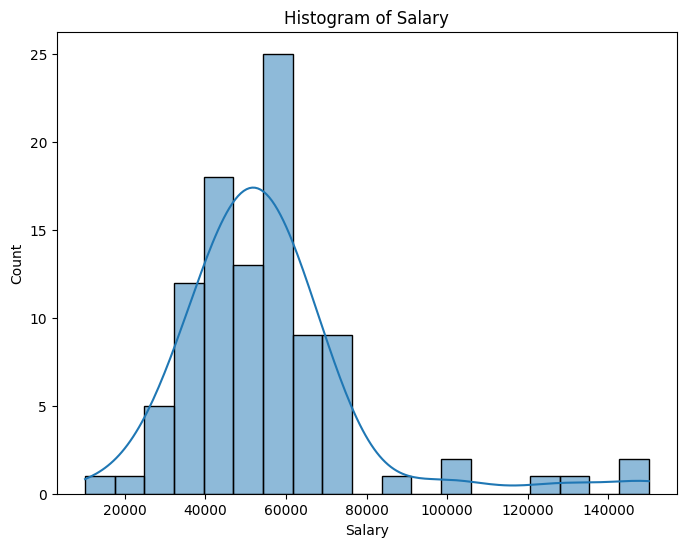

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Salary'], kde=True)
plt.title('Histogram of Salary')
plt.show()

### Computing Key statistics like Mean, Mode, Max Value

Mean

In [32]:
mean_salary = data['Salary'].mean()
print("Mean Salary:", mean_salary)

Mean Salary: 55568.68114995787


median

In [33]:
median_age = data['Age'].median()
print("Median Age:", median_age)

Median Age: 39.0


mode

In [34]:
mode_education = data['Education'].mode()[0]
print("Mode of Education Level:", mode_education)

Mode of Education Level: High School


max-value

In [35]:
max_experience = data['Experience'].max()
print("Max Experience:", max_experience)

Max Experience: 19


min-value

In [36]:
min_experience = data['Experience'].min()
print("Min Experience(years):", min_experience)

Min Experience(years): 1
